<a href="https://colab.research.google.com/github/Bevier19jac/3DDigitalDataset/blob/main/Breast_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


In [2]:
# Load the dataset
breast_cancer = load_breast_cancer()

# Check the sizes
print("Sample size:", breast_cancer.data.shape)
print("Target size:", breast_cancer.target.shape)


Sample size: (569, 30)
Target size: (569,)


In [3]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.3, random_state=42)

# Check the sizes
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (398, 30)
Testing set size: (171, 30)


In [5]:
# Create the Gaussian Naive Bayes model
nb = GaussianNB()

# Train the model
nb.fit(X_train, y_train)


GaussianNB()

In [6]:
# Make predictions
y_pred = nb.predict(X_test)

# Evaluate the model
print("Estimator Score:", nb.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)


Estimator Score: 0.9415204678362573
Confusion Matrix:
 [[ 57   6]
 [  4 104]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92        63
           1       0.95      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



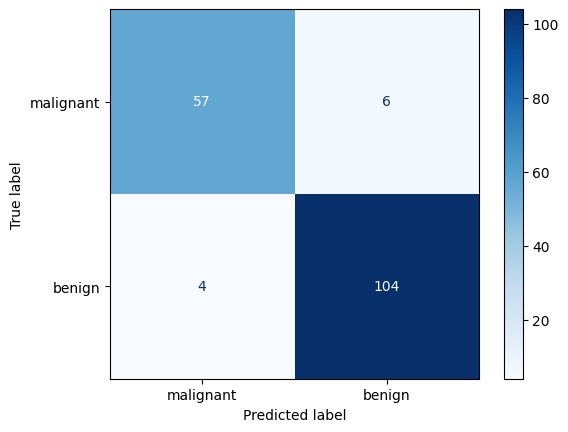

In [7]:
# Visualizing the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=breast_cancer.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [8]:
# Using KFold with cross_val_score
kfold = KFold(n_splits=10, random_state=11, shuffle=True)
scores = cross_val_score(estimator=nb, X=breast_cancer.data, y=breast_cancer.target, cv=kfold)
print("Cross-validation scores:", scores)
print("Average cross-validation score:", np.mean(scores))


Cross-validation scores: [0.96491228 0.9122807  0.94736842 0.89473684 0.96491228 0.94736842
 0.96491228 0.89473684 0.96491228 0.92857143]
Average cross-validation score: 0.9384711779448622


In [9]:
# Dictionary of estimators
estimators = {
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
    'SVC': SVC(gamma='scale')
}

# Evaluate each model
for name, estimator in estimators.items():
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    score = estimator.score(X_test, y_test)
    print(f"{name} Estimator Score: {score}")


GaussianNB Estimator Score: 0.9415204678362573
KNeighborsClassifier Estimator Score: 0.9590643274853801
LogisticRegression Estimator Score: 0.9766081871345029
SVC Estimator Score: 0.935672514619883
